In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm

In [2]:
lengthCompDict = {}
lengthCompDict[1000] = {'totalGroups':0, "GroupMedianDistance":0}
lengthCompDict[2000] = {'totalGroups':0, "GroupMedianDistance":0}
lengthCompDict[3000] = {'totalGroups':0, "GroupMedianDistance":0}
lengthCompDict[4000] = {'totalGroups':0, "GroupMedianDistance":0}
lengthCompDict[5000] = {'totalGroups':0, "GroupMedianDistance":0}
lengthCompDict[6000] = {'totalGroups':0, "GroupMedianDistance":0}
lengthCompDict[7000] = {'totalGroups':0, "GroupMedianDistance":0}
lengthCompDict[8000] = {'totalGroups':0, "GroupMedianDistance":0}
lengthCompDict[9000] = {'totalGroups':0, "GroupMedianDistance":0}
lengthCompDict[10000] = {'totalGroups':0, "GroupMedianDistance":0}

with open('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/finalized/HG01890_final.txt') as f:
    Lines = f.readlines()
    
    
    for repeatBlockNucLength in list(lengthCompDict.keys()):


        AluFlag = 0
        aluEnd =0

        AluCasetteDict = {}
        group = 0
        AluCasetteDict[str(group)]=[]

        for line in tqdm(Lines): 

            goodLine = ' '.join(line.split())

            if AluFlag == 0:

                if goodLine.split(" ")[11] == 'SINE/Alu':
                    aluEnd=int(goodLine.split(" ")[7].strip())
                    AluCasetteDict[str(group)].append(goodLine)
                    AluFlag+=1

                else:
                    continue

            else:


                if (int(goodLine.split(" ")[6])-int(aluEnd)) < int(repeatBlockNucLength):

                    AluCasetteDict[str(group)].append(goodLine)

                    if goodLine.split(" ")[11] == 'SINE/Alu':
                        aluEnd=int(goodLine.split(" ")[7].strip())

                    else:
                        continue

                else:

                    group+=1
                    AluCasetteDict[str(group)]=[]

                    if goodLine.split(" ")[11] == 'SINE/Alu':
                        aluEnd=int(goodLine.split(" ")[7].strip())
                        AluCasetteDict[str(group)].append(goodLine)

                    else:
                        continue

        goodKeys = []
        for x in AluCasetteDict.keys():
            if len(AluCasetteDict[x])>0:
                goodKeys.append(x)
        goodAluGroupDict =   AluCasetteDict.copy()

        for x in AluCasetteDict.keys():
            if x in goodKeys:
                continue
            else:
                del goodAluGroupDict[x]


        tempList = []
        
            
        for key in goodAluGroupDict.keys():
            flag = 0
            distanceMetric = 0
            
            for item in goodAluGroupDict[key]:
                
                if 'SINE/Alu' in item:
                    
                    if flag == 0:
                        
                        distanceMetric = int(item.split(" ")[7].strip())
                        flag=1
                        
                    else:
                        
                        tempList.append(int(item.split(" ")[6].strip())-int(distanceMetric))
                        distanceMetric = int(item.split(" ")[7].strip())
                else:
                    continue

            if int(repeatBlockNucLength) == 1000:
                lengthCompDict[repeatBlockNucLength]['totalGroups'] = len(goodAluGroupDict.keys())
                lengthCompDict[repeatBlockNucLength]['GroupMedianDistance'] = (0) 
            else:
                lengthCompDict[repeatBlockNucLength]['totalGroups'] = len(goodAluGroupDict.keys())
                lengthCompDict[repeatBlockNucLength]['GroupMedianDistance'] = (np.median(tempList)) 

    f.close()

100%|█████████████████████████████████| 16757/16757 [00:00<00:00, 308335.97it/s]
/home/mark/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mark/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|█████████████████████████████████| 16757/16757 [00:00<00:00, 325549.94it/s]


In [3]:
tempList = []
for key in lengthCompDict.keys():
    tempList.append([key, int(lengthCompDict[key]['totalGroups']), int(lengthCompDict[key]['GroupMedianDistance'])])
        
tempDF = pd.DataFrame(data=tempList, columns=['Cutoff_Length','Total_Repeat_Blocks','Median_Distance_Between_Alus'])
tempDF

,Cutoff_Length,Total_Repeat_Blocks,Median_Distance_Between_Alus
0,1000,2685,0
1,2000,2661,251
2,3000,28,2129
3,4000,21,2129
4,5000,21,2129
5,6000,21,2129
6,7000,21,2129
7,8000,20,2129
8,9000,20,2129
9,10000,20,2129


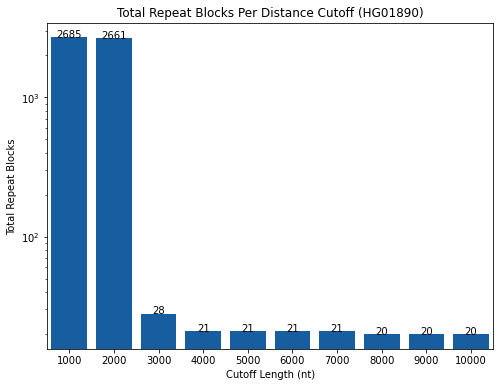

In [4]:
fig, ax = plt.subplots(figsize=(8,6)) 

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            #value = '{:.1f}'.format(p.get_height())
            value = int(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


ax= sns.barplot(data=tempDF,x='Cutoff_Length',y='Total_Repeat_Blocks', log=True, color='#005EB8')
plt.title("Total Repeat Blocks Per Distance Cutoff (HG01890)")
show_values_on_bars(ax)

plt.xlabel("Cutoff Length (nt)")
plt.ylabel("Total Repeat Blocks")
#plt.ylim(0, 6000)
plt.savefig("/home/mark/Desktop/chromosome_y/Images/Distance_CutOffs/Distance_RB_barplot_HG01890.jpg", dpi=300, bbox_inches='tight')
plt.savefig("/home/mark/Desktop/chromosome_y/Images/Distance_CutOffs/Distance_RB_barplot_HG01890.pdf", dpi=300, bbox_inches='tight')

plt.show()

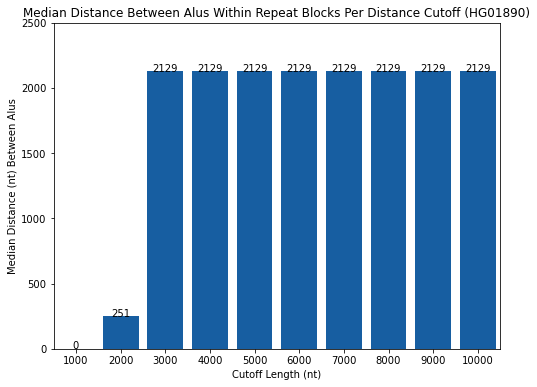

In [5]:
fig, ax = plt.subplots(figsize=(8,6)) 

ax = sns.barplot(data=tempDF,x='Cutoff_Length',y='Median_Distance_Between_Alus', log=False, color='#005EB8')
show_values_on_bars(ax)
plt.ylim(0, 2500)
plt.xlabel("Cutoff Length (nt)")
plt.ylabel("Median Distance (nt) Between Alus")

plt.title("Median Distance Between Alus Within Repeat Blocks Per Distance Cutoff (HG01890)")
plt.savefig("/home/mark/Desktop/chromosome_y/Images/Distance_CutOffs/Distance_Length_barplot_HG01890.jpg", dpi=300, bbox_inches='tight')
plt.savefig("/home/mark/Desktop/chromosome_y/Images/Distance_CutOffs/Distance_Length_barplot_HG01890.pdf", dpi=300, bbox_inches='tight')

plt.show()